# Content and Objective

+ Show different aspects when dealing with FFT
+ Using rectangular function in time and frequency for illustration

# Importing and Plotting Options

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Define Rect and Get Spectrum

In [3]:
# min and max time, sampling time
t_min = -5.0
t_max = 5.0
t_s = 0.1                                 # sample time

# vector of times
t=np.arange(t_min, t_max + t_s, t_s )

# duration of rect and according instants in time
T_rect = 2            # width of the rectangular
t_rect = np.arange( - T_rect/2, T_rect / 2 + t_s, t_s )
    
# sample number of domain and signal
M = len( t )    
M_rect = len( t_rect )

In [4]:
# frequency axis
# NOTE: resolution given by characteristics of DFT
f_Nyq = 1 / ( 2*t_s )
delta_f = 1 / ( t_max-t_min )

f = np.arange( -f_Nyq, f_Nyq + delta_f, delta_f )   

In [5]:
# rectangular function,
# one signal with ones in the middle, one signal with ones at the beginning, one signal being periodical
rect_midway = 0 * t
rect_midway[ (M-M_rect)//2 : (M-M_rect)//2+M_rect ] = 1

rect_left = 0*t
rect_left[ : M_rect] = 1

rect_periodic = 0*t
rect_periodic[ : M_rect// 2 +1 ] = 1
rect_periodic[ len(t) - M_rect // 2 : ] = 1

# choose
rect = rect_left
rect = rect_midway
rect = rect_periodic

Text(0, 0.5, '$X(f)$')

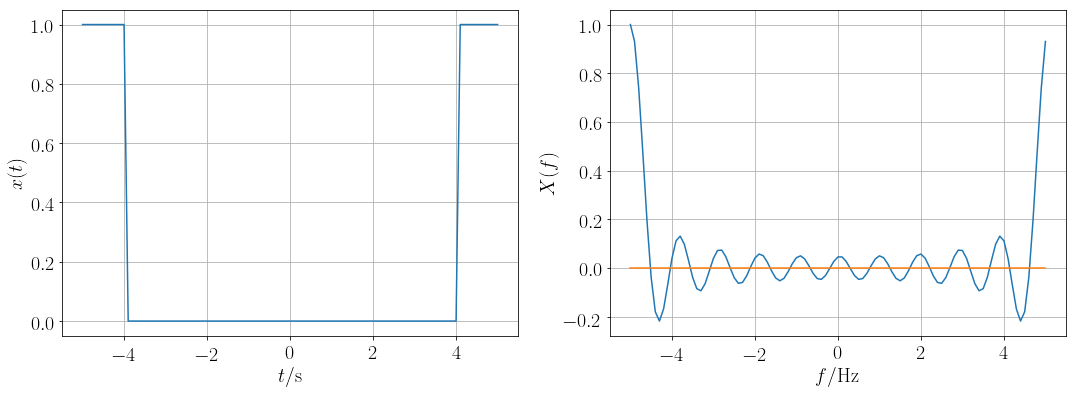

In [6]:
# frequency rect corresponds to time sinc
RECT = np.fft.fft( rect )
RECT = RECT / np.max( np.abs(RECT) )


# plotting  
plt.subplot(121)
plt.plot(t, rect)

plt.grid(True);    
plt.xlabel('$t/\mathrm{s}$');    
plt.ylabel('$x(t)$')

plt.subplot(122)
plt.plot(f, np.real( RECT ) )
plt.plot(f, np.imag( RECT ) )

plt.grid(True);    
plt.xlabel('$f/\mathrm{Hz}$');    
plt.ylabel('$X(f)$')

# Questions:

Some choices for rect generate error message "... imaginary part..." and strange behavior in the frequency regime. 

+ Which "imaginary part"? Isn't rect <--> sinc?
+ Why is the spectrum that "strange"?